# Group API Project: Crime Rates and Unemployment Rates

## November 10, 2021 -- Jamie Mortensen, Heather Leighton-Dick


What, if any, relationship is there between national property crimes rates versus unemployment rates in the years from 2010 to 2020?

Is there a noticeable difference between the years? 

Is there a correlation between crime and unemployment rates? 

Is there a noticeably stronger correlation in one subgroup of property crimes than the others?

### Sources & Definitions:

We extracted data from the FBI's Crime Data Explorer API and the Bureau of Labor Statistics' Public Data API.

The CDE API is the FBI’s Uniform Crime Reporting (UCR) Program's effort to report the nation's crime data in a more timely and detailed way. It estimates national and state data and agency-level crime statistics based on the National Incident-Based Reporting System (NIBRS). The UCR has been operating since 1930, and has transitioned fully this year from the Summary Reporting System (started in 1979) to the NIBRS format. As of January 1, 2021, NIBRS will be used exclusively; some of the data will be reported in SRS standard to maintain continuity and compatibility of data.

-- https://crime-data-explorer.fr.cloud.gov/pages/about

The BLS's Public Data API provides access to a lot of different categories of statistics, but we pulled down basic information on the unemployment numbers and created a proportion with the general population to get a percentage rate.

### Definitions:

It was vital to get a basic understanding of the legal differences between the different types of property crime in order to be able to construct the APIs and to understand how the data categories are related to each other.

In particular:

property crime: a category of crime, usually involving private property, that includes burglary, larceny, theft, motor vehicle theft, arson, shoplifting, and vandalism; the umbrella term for burglary, robbery, and larceny

burglary: entry into a building with the intent to commit a crime, most often theft, robbery, or murder

robbery: taking property unlawfully from a person or place by force or threat of force

larceny: the theft of physical items that are personal property, without threat of force (theft includes all variations on stealing property from another person or entity)

### Set-Up and Importing Modules

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from pprint import pprint
import citipy
import json
from citipy import citipy
import seaborn as sns
import prettytable

from API_Keys import FBI_api_key, BLS_api_key

## Performing the API Calls and Collecting the Data

## Burglary Data

In [3]:
#base_url: https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/{burglary}/offense/national/{count}
headers = {"Incident": "incident_count", "Offense": "offense_count", "Year": "data_year"}
#burglary, count
fbi_burglary_ct = requests.get('https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/burglary-breaking-and-entering/offense/national/count/?limit=1&api_key=HXzuNSaaIO46x38N0iVVKpMDgrP6GG3mxBcacgRH',headers=headers)
fbi_json_bur_ct = json.loads(fbi_burglary_ct.text)

In [4]:
#cleaning and reformatting the data (used in stacked bar graph)
raw_fbi_bur_ct = []
raw_fbi_bur_ct.append(fbi_json_bur_ct)
fbi_unformed_bur_ct = pd.json_normalize(raw_fbi_bur_ct, record_path = ["results"])
fbi_unformed_bur_ct.to_csv('fbi_unformed_bur_ct_csv.csv')

In [5]:
#formatting the dataframe (used in stacked bar graph)
fbi_burglary_ct_df = pd.read_csv('fbi_unformed_bur_ct_csv.csv')
fbi_burglary_ct_df = fbi_burglary_ct_df[["offense_count", "data_year"]]
fbi_burglary_ct_df.rename(columns={"data_year":"Year(B)", "offense_count":"Offense Count(B)"}, inplace=True)
fbi_burglary_ct_df_srt = fbi_burglary_ct_df.sort_values("Year(B)")

fbi_burglary_ct_df_set = fbi_burglary_ct_df_srt[fbi_burglary_ct_df_srt["Year(B)"] > 2010]
fbi_burglary_ct_df_set

,Offense Count(B),Year(B)
11,585312,2011
0,586634,2012
29,537536,2013
22,482371,2014
21,462537,2015
9,462509,2016
1,441958,2017
28,434631,2018
19,494159,2019
18,522426,2020


### Burglary Data Line Plot

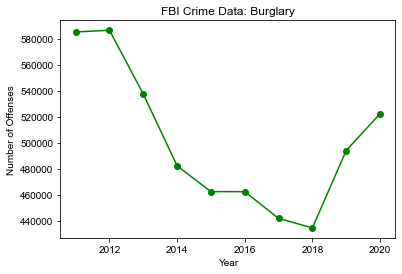

In [6]:
#creating the plot
fig,ax=plt.subplots()
sns.set_style("darkgrid")

ax.plot(fbi_burglary_ct_df_set["Year(B)"], fbi_burglary_ct_df_set["Offense Count(B)"], marker = 'o',  color = 'green')
ax.set_xlabel("Year")
ax.set_ylabel("Number of Offenses")
ax.set_title('FBI Crime Data: Burglary')

plt.show()

### Burglary trend summary:
There was a long downward trend in burglaries from 2012 to 2018, but 2018 to 2020 saw an increase, the greatest of which was during 2018.

## Robbery Data

In [7]:
#robbery, count
fbi_robbery_ct = requests.get('https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/robbery/offense/national/count/?limit=1&api_key=HXzuNSaaIO46x38N0iVVKpMDgrP6GG3mxBcacgRH')
fbi_json_robbery_ct = json.loads(fbi_robbery_ct.text)

In [8]:
#cleaning and reformatting the data (used in stacked bar graph)
raw_fbi_robbery_ct = []
raw_fbi_robbery_ct.append(fbi_json_robbery_ct)
fbi_unformed_robbery_ct = pd.json_normalize(raw_fbi_robbery_ct, record_path = ["results"])
fbi_unformed_robbery_ct.to_csv('fbi_unformed_robbery_ct_csv.csv')

In [9]:
#formatting the dataframe (used in stacked bar graph)
fbi_robbery_ct_df = pd.read_csv('fbi_unformed_robbery_ct_csv.csv')
fbi_robbery_ct_df = fbi_robbery_ct_df[["offense_count", "data_year"]]
fbi_robbery_ct_df.rename(columns={"data_year":"Year(R)", "offense_count":"Offense Count(R)"}, inplace=True)
fbi_robbery_ct_df_srt = fbi_robbery_ct_df.sort_values("Year(R)")
fbi_robbery_ct_df_set = fbi_robbery_ct_df_srt[fbi_robbery_ct_df_srt["Year(R)"] > 2010]
fbi_robbery_ct_df_set

,Offense Count(R),Year(R)
15,72942,2011
3,74626,2012
26,72200,2013
23,68471,2014
25,70713,2015
10,73328,2016
4,72311,2017
28,78559,2018
19,95627,2019
20,102677,2020


### Robbery Data Line Plot

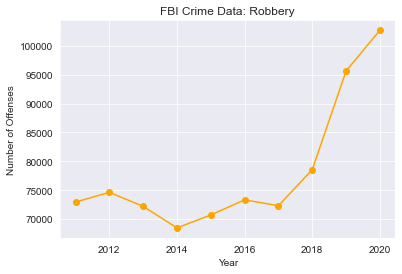

In [10]:
# creating the plot
fig,ax=plt.subplots()

ax.plot(fbi_robbery_ct_df_set["Year(R)"], fbi_robbery_ct_df_set["Offense Count(R)"], marker = 'o',  color = 'orange')
ax.set_xlabel("Year")
ax.set_ylabel("Number of Offenses")
ax.set_title('FBI Crime Data: Robbery')

plt.show()

### Robbery trend summary:
Numbers remained low from 2011 to 2017, then rose pretty steeply from 2018 to 2020, similarly to burglaries.

## Larceny Data

In [11]:
#larceny, count
fbi_larceny_ct = requests.get('https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/larceny-theft-offenses/offense/national/count/?limit=1&api_key=HXzuNSaaIO46x38N0iVVKpMDgrP6GG3mxBcacgRH')
fbi_json_larceny_ct = json.loads(fbi_larceny_ct.text)

In [12]:
#cleaning and reformatting the data (used in stacked bar graph)
raw_fbi_larceny_ct = []
raw_fbi_larceny_ct.append(fbi_json_larceny_ct)
fbi_unformed_larceny_ct = pd.json_normalize(raw_fbi_larceny_ct, record_path = ["results"])
fbi_unformed_larceny_ct.to_csv('fbi_unformed_larceny_ct_csv.csv')

In [13]:
#formatting the dataframe (used in stacked bar graph)
fbi_larceny_ct_df = pd.read_csv('fbi_unformed_larceny_ct_csv.csv')
fbi_larceny_ct_df = fbi_larceny_ct_df[["offense_count", "data_year"]]
fbi_larceny_ct_df.rename(columns={"data_year":"Year(L)", "offense_count":"Offense Count(L)"}, inplace=True)
fbi_larceny_ct_df_srt = fbi_larceny_ct_df.sort_values("Year(L)")
fbi_larceny_ct_df_final = fbi_larceny_ct_df_srt.groupby("Year(L)").sum()
fbi_larceny_ct_df_final.reset_index()
fbi_larceny_ct_df_final.reset_index(inplace = True) 
fbi_larceny_ct_df_final_set = fbi_larceny_ct_df_final[fbi_larceny_ct_df_final["Year(L)"] > 2010]
fbi_larceny_ct_df_final_set

,Year(L),Offense Count(L)
20,2011,1715009
21,2012,1792213
22,2013,1760951
23,2014,1722483
24,2015,1741204
25,2016,1789788
26,2017,1816210
27,2018,1902857
28,2019,2271350
29,2020,2453533


### Larceny Line Plot

<class 'str'>


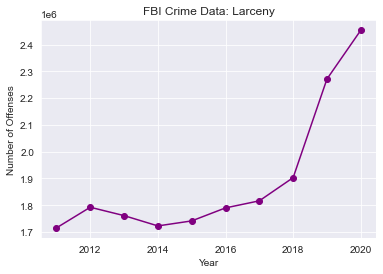

In [28]:
#creating the plot
fig,ax=plt.subplots()

ax.plot(fbi_larceny_ct_df_final_set["Year(L)"], fbi_larceny_ct_df_final_set["Offense Count(L)"], marker = 'o',  color = 'purple')
ax.set_xlabel("Year")
ax.set_ylabel("Number of Offenses")
ax.set_title('FBI Crime Data: Larceny')

plt.show()

### Larceny trend summary:
Larcenies followed a similar trend to robberies, in that the numbers stayed relatively level until they rose steeply from 2018 to 2020.

### Counts of Burglary, Robbery, and Larceny Over 10 Years

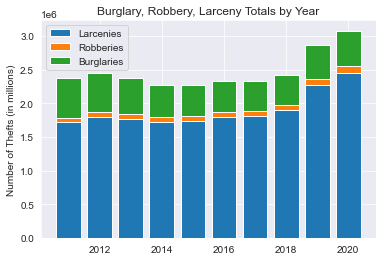

In [15]:
#merging databases
#merged_inner = pd.merge(left=survey_sub, right=species_sub, left_on='species_id', right_on='species_id')
fbi_twototals_df = pd.merge(left=fbi_larceny_ct_df_final_set, right=fbi_robbery_ct_df_set, left_on='Year(L)', right_on='Year(R)') 
fbi_totals_df = pd.merge(left=fbi_twototals_df, right=fbi_burglary_ct_df_set, left_on='Year(L)', right_on='Year(B)')
fbi_totals_df = fbi_totals_df[['Year(L)', 'Offense Count(L)', 'Offense Count(R)', 'Offense Count(B)']]
fbi_totals_df

#plotting the data
fig,ax=plt.subplots()
ax.bar(fbi_totals_df["Year(L)"], fbi_totals_df["Offense Count(L)"], label="Larcenies")
ax.bar(fbi_totals_df["Year(L)"], fbi_totals_df["Offense Count(R)"], bottom=fbi_totals_df["Offense Count(L)"], label="Robberies")
ax.bar(fbi_totals_df["Year(L)"], fbi_totals_df["Offense Count(B)"], bottom = fbi_totals_df["Offense Count(L)"]+fbi_totals_df["Offense Count(R)"], label = "Burglaries")

ax.set_title("Burglary, Robbery, Larceny Totals by Year")
#ax.set_xticklabels(fbi_totals_df["Year(L)"], rotation=90)
ax.set_ylabel("Number of Thefts (in millions)")
ax.legend()

plt.show()

## Unemployment Rate

In [16]:
#API call - BLS
base_url="https://api.bls.gov/publicAPI/v2/timeseries/data/?registrationkey="+BLS_api_key+"&catalog=false&startyear=2011&endyear=2020&calculations=true&annualaverage=true&aspects=true"

new_list =[]

headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['LNS14000000'],"startyear":"2011", "endyear":"2020"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
bls_json_unemp_ct = json.loads(p.text)
for series in bls_json_unemp_ct['Results']['series']:
    x=prettytable.PrettyTable(["series id","year","period","value","footnotes"])
    seriesId = series['seriesID']
    for item in series['data']:
        year = item['year']
        period = item['period']
        value = item['value']
        footnotes=""
        for footnote in item['footnotes']:
            if footnote:
                footnotes = footnotes + footnote['text'] + ','
        if 'M01' <= period <= 'M12':
            x.add_row([seriesId,year,period,value,footnotes[0:-1]])
            unemp_list=[seriesId,year,period,value,footnotes[0:-1]]
            new_list.append(unemp_list)
    output = open(seriesId + '.txt','w')
    output.write (x.get_string())
    output.close()


In [17]:
#data from json to df to csv
unemp_df=pd.DataFrame(new_list)
unemp_df=unemp_df.rename(columns={0:'seriesID',1:'year',2:'month',3:'rate', 4:'footnotes'})
unemp_df.to_csv('unemp_df_csv.csv') 
print(unemp_df)

        seriesID  year month rate footnotes
0    LNS14000000  2020   M12  6.7          
1    LNS14000000  2020   M11  6.7          
2    LNS14000000  2020   M10  6.9          
3    LNS14000000  2020   M09  7.8          
4    LNS14000000  2020   M08  8.4          
..           ...   ...   ...  ...       ...
115  LNS14000000  2011   M05  9.0          
116  LNS14000000  2011   M04  9.1          
117  LNS14000000  2011   M03  9.0          
118  LNS14000000  2011   M02  9.0          
119  LNS14000000  2011   M01  9.1          

[120 rows x 5 columns]


In [18]:
# change value types from strings to integer & float to calc annual avg
convert_dict = {'year': int,
                'rate': float}
unemp_df = unemp_df.astype(convert_dict)
unemp_mean=unemp_df.groupby(['year'])['rate'].mean().reset_index()
print(unemp_mean)

   year      rate
0  2011  8.933333
1  2012  8.075000
2  2013  7.358333
3  2014  6.158333
4  2015  5.275000
5  2016  4.875000
6  2017  4.350000
7  2018  3.891667
8  2019  3.683333
9  2020  8.108333


### Unemployment Rate Line Plot

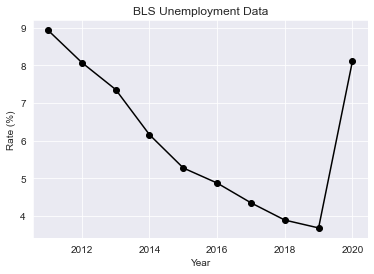

In [19]:
#creating the plot
fig,ax=plt.subplots()

ax.plot(unemp_mean["year"], unemp_mean["rate"], marker = 'o',  color = 'black')
ax.set_xlabel("Year")
ax.set_ylabel("Rate (%)")
ax.set_title('BLS Unemployment Data')

plt.show()

### Unemployment trend summary:
The unemployment rate was steadily decreasing from 2011 to 2019, but in 2020 we saw the rate jump back up to 2012 levels.

## Comparing Property Theft and Unemployment Over 10 Years

In general, during the period 2018 to 2020, both property crime counts and the unemployment rate went up fairly sharply. We can't draw any conclusions on causation between the two, although we might speculate that the 2020 data is affected by the COVID pandemic. This period of time might be a good nexus of information to explore in more depth, with more information about the offenders' employment status at the time of committing the crime, and whether they are repeat offenders.

It bears mentioning too, that these are not complete pictures of the property crime counts, because many people do not report thefts to the police, many of those crimes remain unsolved, and agencies like police departments do not necessarily report consistently to the FBI.

## Lessons Learned

1) Be careful of data that isn't labeled clearly; for example, "value" in the unemployment data was extremely vague
and required extra research.

2) It follows from the first point, but information literacy is important. It's not enough to be able to manipulate the data; we have to be able to figure out what data has been included and whether the labels are accurate (in the course of the project, some data were represented as is more usual in the statistics and economics fields as a way of abbreviating large numbers "normalized x100,000").

3) Sometimes data will be stored using unfamiliar python modules, like "prettytable," which needs to be downloaded in addition to the usual suspects.

### Resources:
Information on Legal Definitions and Relationships Between Types of Property Crimes

https://www.atlantapd.org/home/showpublisheddocument/2881/637062879602730000

Pew Research Center article on crime in the U.S.

https://www.pewresearch.org/fact-tank/2020/11/20/facts-about-crime-in-the-u-s/